In [7]:
import pandas as pd 


data = pd.read_csv('../dataset/dados_pregao_intb3.csv')
data = data.rename(columns={'data_pregao': 'ds', 'preco_ultimo_negocio': 'y'})
colunas = ['ds', 'y']
data = data[colunas]
data['ds'] = pd.to_datetime(data['ds'])

data

,ds,y
0,2021-02-04,19.74
1,2021-02-05,20.00
2,2021-02-08,19.29
3,2021-02-09,20.00
4,2021-02-10,19.50
...,...,...
913,2024-10-01,20.38
914,2024-10-02,20.65
915,2024-10-03,20.13
916,2024-10-04,20.29


In [8]:
from prophet import Prophet

model = Prophet()
model.fit(data)

10:47:38 - cmdstanpy - INFO - Chain [1] start processing
10:47:39 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = model.make_future_dataframe(periods=30, freq='D')
forecast = model.predict(future)

c:\Users\suporte\Documents\Workspace\pregao_forecasting\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\suporte\Documents\Workspace\pregao_forecasting\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\suporte\Documents\Workspace\pregao_forecasting\.venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will

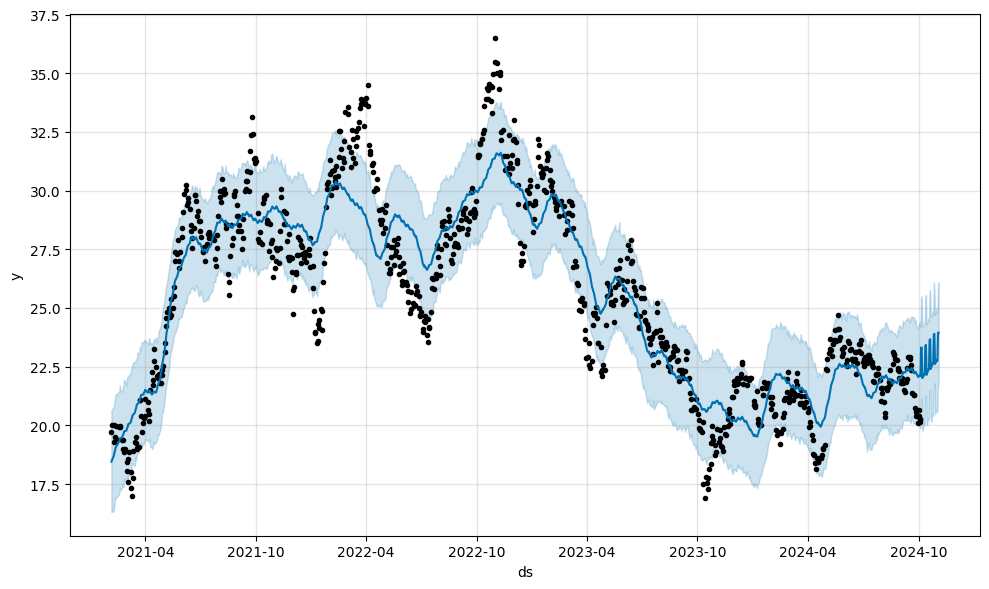

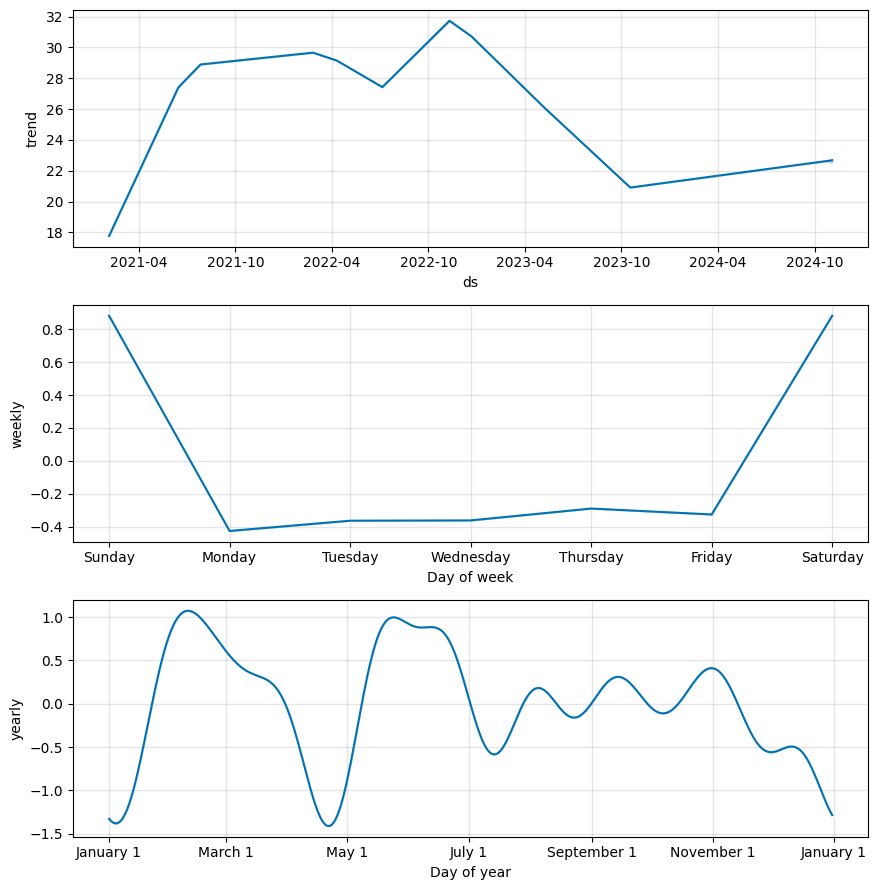

In [10]:
from prophet.plot import plot, plot_components
from matplotlib import pyplot as plt

plot(model, forecast)
plot_components(model, forecast)
plt.show()

In [11]:
import numpy as np
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

df_metrics = performance_metrics(df_cv)

mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
mse = mean_squared_error(df_cv['y'], df_cv['yhat'])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Square Error: {mse:.2f}')
print(f'Root Mean Square Error: {rmse:.2f}')

  0%|          | 0/2 [00:00<?, ?it/s]10:47:40 - cmdstanpy - INFO - Chain [1] start processing
10:47:40 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 1/2 [00:00<00:00,  2.33it/s]10:47:41 - cmdstanpy - INFO - Chain [1] start processing
10:47:41 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 2/2 [00:00<00:00,  2.13it/s]


Mean Absolute Error: 8.27
Mean Square Error: 81.69
Root Mean Square Error: 9.04


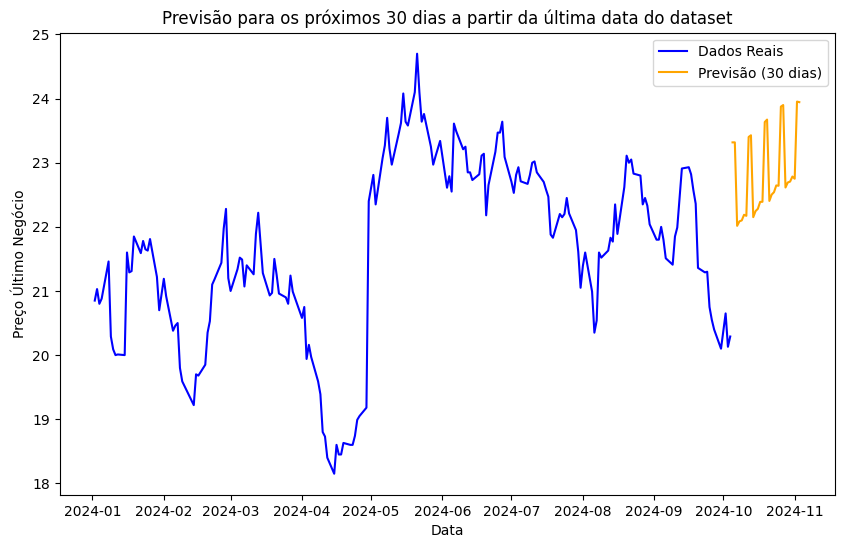

In [13]:
#Filtrar os dados e previsões a partir de 2024
data_filtered = data[data['ds'] >= '2024-01-02']

# Plotar os dados reais e as previsões
plt.figure(figsize=(10, 6))

# Plotar o dataset original (dados históricos)
plt.plot(data_filtered['ds'], data_filtered['y'], label='Dados Reais', color='blue')

# Plotar a previsão (somente os 30 dias futuros)
future_forecast = forecast[forecast['ds'] > data['ds'].max()]  # Filtrar os próximos 30 dias
plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Previsão (30 dias)', color='orange')

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço Último Negócio')
plt.title('Previsão para os próximos 30 dias a partir da última data do dataset')
plt.legend()

# Exibir o gráfico
plt.show()